In [ ]:

!pip install ucimlrepo

# 1.0 Import Data

Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_raw = wine_quality.data.features
y_raw = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
full_data = pd.concat([X_raw, y_raw], axis=1)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
# Check if there are duplicates
full_data.duplicated().sum()

1179

In [ ]:
full_data.drop_duplicates(inplace=True)

In [ ]:
full_data.shape

(5318, 12)

# 2.0 Dataset Preprocessing

We are splitting the dataset into 3 sets, including:

- Validation: 15% (model never seen it);
- Test: 15%;
- Train: 70%.

In [ ]:
# Randomly take 15% of the dataset as validation set, seeding: 27
validation_data = full_data.sample(frac=0.15, random_state=27)
train_test_data = full_data.drop(validation_data.index)

In [ ]:
X_val = validation_data.drop('quality', axis=1)
y_val = validation_data['quality']

In [ ]:
# Take the dataset's quality column as y, the rest as X
y = train_test_data['quality']
X = train_test_data.drop('quality', axis=1)

print(f'Feature train_test shape: {X.shape}')
print(f'Label train_test shape: {y.shape}')

Feature train_test shape: (4520, 11)
Label train_test shape: (4520,)


In [ ]:
from sklearn.model_selection import train_test_split
# Train test split of the data using train_test_split function, with a ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.3)

----------

Please start from here:

As coded above, X_val y_val are validation set. Please do not use it until the end when validate the model to check the accuracy.

For training, X_train, X_test, y_train, y_test are defined for model training.

Before next meeting on Saturday:

1. Zhanyang: ResNet
2. Dylan: Neural Networks, logistic regression
3. Eric: JTT
4. Reza: SVM

Everyone:

Look for libraries for
**Forgettability Score**
to finding instances that is unforgettable and forgettable.





#3.0 Modeling - Linear

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

linear_model = LinearRegression()
linear_model.fit(X, y)
y_test_pred = linear_model.predict(X_test)


# Predict continuous values
y_test_pred_continuous = linear_model.predict(X_test)

# Convert continuous predictions to discrete class labels (e.g., rounding)
y_test_pred = np.round(y_test_pred_continuous).astype(int)
# print("Unique labels in y_true:", np.unique(y_test))
# Evaluate classification performance
print("\nFinal Classification Report (Linear Regression Model):")
print(classification_report(y_test, y_test_pred, digits=2))


Final Classification Report (Linear Regression Model):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        62
           5       0.59      0.53      0.56       457
           6       0.51      0.74      0.61       586
           7       0.39      0.19      0.25       197
           8       0.00      0.00      0.00        38

    accuracy                           0.53      1356
   macro avg       0.25      0.24      0.24      1356
weighted avg       0.48      0.53      0.49      1356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# import shap


# explainer = shap.Explainer(model.predict, X)

# # Explain all samples
# shap_values = explainer(X)

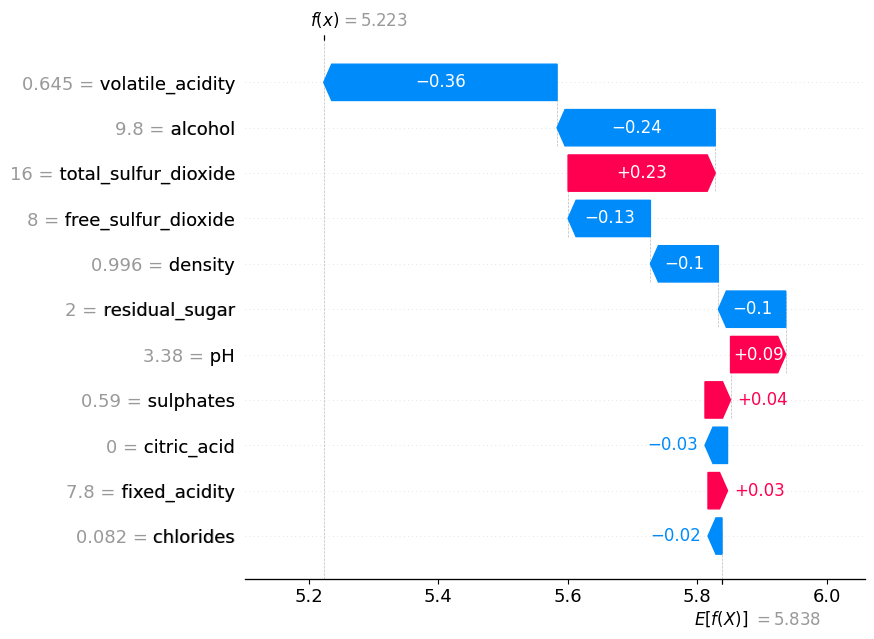

In [ ]:
shap.plots.waterfall(shap_values[20], max_display=14)

In [ ]:
y.iloc[20]

6

#New Model - CNN

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Model Training and count correction
num_epochs = 3
num_samples = X_train.shape[0]
correctness_log = np.zeros((num_samples, num_epochs))

cnn = MLPClassifier(hidden_layer_sizes=(16, 8), warm_start=True, random_state=42)

# Simulate iterative training
for epoch in range(num_epochs):
    cnn.fit(X_train, y_train)
    predictions = cnn.predict(X_train)

y_test_pred = cnn.predict(X_test)
print("\nCurrent Classification Report (pre-train model) on test data:")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))

y_val_pred = cnn.predict(X_val)
print("\nCurrent Classification Report (pre-train model) on validate data:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Current Classification Report (pre-train model) on test data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.250     0.016     0.030        62
           5      0.554     0.639     0.593       457
           6      0.514     0.667     0.581       586
           7      0.354     0.117     0.176       197
           8      0.000     0.000     0.000        38

    accuracy                          0.521      1356
   macro avg      0.279     0.240     0.230      1356
weighted avg      0.472     0.521     0.478      1356


Current Classification Report (pre-train model) on validate data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.000     0.000     0.000        31
           5      0.600     0.705     0.648       264
           6      0.509     0.671     0.579       337
           7      0.432     0.141     0.212       135
  

In [ ]:
# explainer = shap.Explainer(model1.predict, X)

# shap_values = explainer(X)

PermutationExplainer explainer: 4521it [15:23,  4.86it/s]


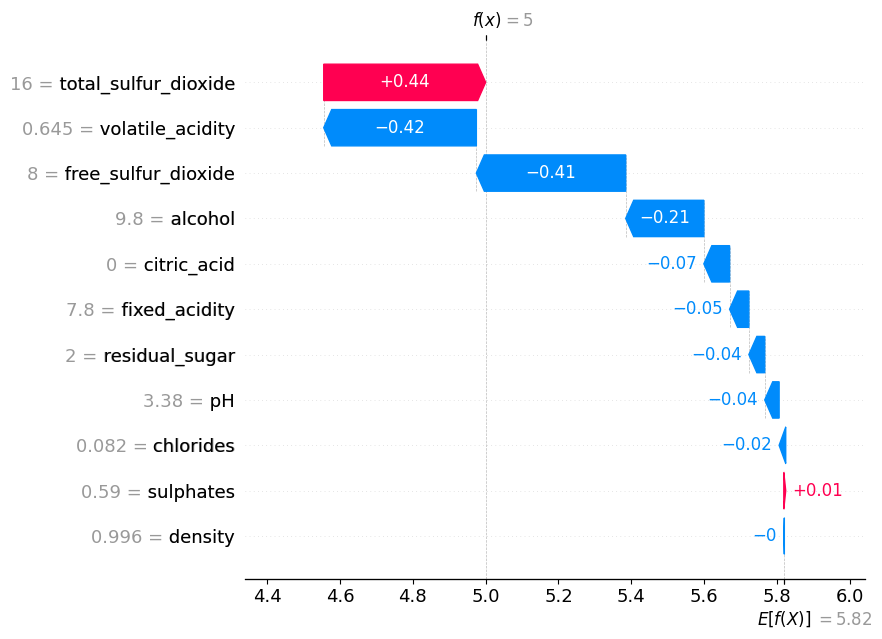

In [ ]:
# shap.plots.waterfall(shap_values[20], max_display=14)

# JTT without data reduction

In [ ]:
from sklearn.utils import resample

train_predictions = cnn.predict(X_train)
misclassified_indices = np.where(train_predictions != y_train)[0]

X_minority = X_train.iloc[misclassified_indices]
y_minority = y_train.iloc[misclassified_indices]

# Upsample misclassified examples
X_upsampled, y_upsampled = resample(
    X_minority, y_minority,
    replace=True,
    n_samples=len(X_minority) * 2,  # Duplicate the misclassified examples
    random_state=42
)

# Combine original data with upsampled misclassified examples
X_combined = np.vstack((X_train, X_upsampled))
y_combined = np.hstack((y_train, y_upsampled))

num_epochs = 10
for epoch in range(num_epochs):
    X_combined = pd.DataFrame(X_combined, columns=X_train.columns)
    y_combined = y_combined.values.ravel() if isinstance(y_combined, pd.DataFrame) else y_combined
    cnn.partial_fit(X_combined, y_combined)
    # train_loss = cnn.loss_
    # print(f"Fine-tuning Epoch {epoch+1}/10, Training Loss: {train_loss:.4f}")


y_test_pred = cnn.predict(X_test)
print("\Final Classification Report (JTT Fine-Tuned Model) on test dataset :")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))


y_val_pred = cnn.predict(X_val)
print("\nFinal Classification Report (JTT Fine-Tuned Model) on val dataset:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))

\Final Classification Report (JTT Fine-Tuned Model) on test dataset :
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.211     0.065     0.099        62
           5      0.550     0.591     0.570       457
           6      0.501     0.454     0.476       586
           7      0.343     0.548     0.422       197
           8      0.000     0.000     0.000        38

    accuracy                          0.478      1356
   macro avg      0.267     0.276     0.261      1356
weighted avg      0.461     0.478     0.464      1356


Final Classification Report (JTT Fine-Tuned Model) on val dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.111     0.032     0.050        31
           5      0.579     0.614     0.596       264
           6      0.493     0.439     0.465       337
           7      0.416     0.644     0.506     

#purge by least_forgettable_indices New Model

In [ ]:
from collections import defaultdict
# Model Training and count correction
num_epochs = 3
num_samples = X.shape[0]
correctness_log = np.zeros((num_samples, num_epochs))

cnn2 = MLPClassifier(hidden_layer_sizes=(16, 8), warm_start=True, random_state=42)

for epoch in range(num_epochs):
    cnn2.fit(X, y)
    predictions = cnn2.predict(X)
    correctness_log[:, epoch] = (predictions == y).astype(int)

y_test_pred = cnn2.predict(X_test)
print("\nCurrent Classification Report (pre-train Model) on reduced test dataset :")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))


y_val_pred = cnn2.predict(X_val)
print("\nCurrent Classification Report (pre-train model) on reduced validate data:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))

# Calculate forgettability scores
forgetting_events = np.sum((correctness_log[:, 1:] < correctness_log[:, :-1]), axis=1)
#This part is to keep the categories that only have a few as otherwise they get thrown out
class_indices = defaultdict(list)
for idx, label in enumerate(y_train):
    class_indices[label].append(idx)

# Calculate the number of examples to keep per class
reduction_factor = 0.7  # Keep 70% of data
num_examples_to_keep_per_class = {}
for label, indices in class_indices.items():
    num_examples = len(indices)
    num_to_keep = max(1, int(num_examples * reduction_factor))  # Ensure at least one example is kept
    num_examples_to_keep_per_class[label] = num_to_keep

# Select examples to keep per class
indices_to_keep = []
for label, indices in class_indices.items():
    # Get forgetting scores or EL2N scores for the current class
    class_scores = forgetting_events[indices]  # or el2n_scores[indices]
    # Rank indices within the class
    sorted_class_indices = [indices[i] for i in np.argsort(class_scores)]
    # Select top examples to keep
    indices_to_keep.extend(sorted_class_indices[-num_examples_to_keep_per_class[label]:])

# Create the reduced dataset
X_train_reduced = X_train.reset_index().loc[indices_to_keep].drop(columns="index")
y_train_reduced = y_train.reset_index().loc[indices_to_keep].drop(columns="index")

print(f"Original training size: {X_train.shape}")
print(f"New training size after data drop: {X_train_reduced.shape}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Current Classification Report (pre-train Model) on reduced test dataset :
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.000     0.000     0.000        62
           5      0.620     0.453     0.523       457
           6      0.507     0.782     0.615       586
           7      0.415     0.249     0.311       197
           8      0.000     0.000     0.000        38

    accuracy                          0.527      1356
   macro avg      0.257     0.247     0.242      1356
weighted avg      0.488     0.527     0.487      1356


Current Classification Report (pre-train model) on reduced validate data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.000     0.000     0.000        31
           5      0.647     0.492     0.559       264
           6      0.496     0.777     0.606       337
           7      0.493     0.252   

# JTT with data reduction

In [ ]:
# Model Training and count correction
train_predictions = cnn2.predict(X_train_reduced)
y_train_reduced = y_train_reduced.squeeze()
# print(f"The shape for train_predictions {train_predictions.shape} and y {y_train_reduced.shape}")

misclassified_indices = np.where(train_predictions != y_train_reduced)[0]


X_minority = X_train_reduced.iloc[misclassified_indices]
y_minority = y_train_reduced.iloc[misclassified_indices]



# Upsample the misclassified examples
X_upsampled, y_upsampled = resample(
    X_minority, y_minority,
    replace=True,
    n_samples=len(X_minority) * 2,  # Duplicate the misclassified examples
    random_state=42
)

# Combine upsampled data with the original training data
X_combined = np.vstack([X_train_reduced, X_upsampled])
y_combined = np.hstack([y_train_reduced, y_upsampled])

num_epochs = 10
# Robust training on the model
for epoch in range(num_epochs):
    X_combined = pd.DataFrame(X_combined, columns=X_train.columns)
    y_combined = y_combined.values.ravel() if isinstance(y_combined, pd.DataFrame) else y_combined
    cnn2.partial_fit(X_combined, y_combined)
    train_loss = cnn2.loss_
    # print(f"Fine-tuning Epoch {epoch+1}/10, Training Loss: {train_loss:.4f}")

y_test_pred = cnn2.predict(X_test)
print("\nFinal Classification Report (JTT Fine-Tuned Model) on reduced test dataset :")
print(classification_report(y_test, y_test_pred, digits=3,zero_division=0))


y_val_pred = cnn2.predict(X_val)
print("\nFinal Classification Report (JTT Fine-Tuned Model) on reduced val dataset :")
print(classification_report(y_val, y_val_pred, digits=3,zero_division=0))


Final Classification Report (JTT Fine-Tuned Model) on reduced test dataset :
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.231     0.048     0.080        62
           5      0.542     0.681     0.603       457
           6      0.527     0.363     0.430       586
           7      0.332     0.614     0.431       197
           8      0.000     0.000     0.000        38

    accuracy                          0.478      1356
   macro avg      0.272     0.284     0.257      1356
weighted avg      0.469     0.478     0.455      1356


Final Classification Report (JTT Fine-Tuned Model) on reduced val dataset :
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.167     0.032     0.054        31
           5      0.588     0.731     0.652       264
           6      0.525     0.368     0.433       337
           7      0.382     0.6

In [ ]:
import shap
import torch
import shap
import pandas as pd
import numpy as np

# Convert training data to NumPy arrays for SHAP but maintain feature names for DataFrame compatibility
X_train_original_np = X_train.to_numpy()
X_train_reduced_np = X_train_reduced.to_numpy()

background_samples = 100  # Number of background samples for SHAP
X_background = X_train_original_np[np.random.choice(X_train_original_np.shape[0], background_samples, replace=False)]

# Ensure SHAP data has feature names by converting NumPy arrays back to DataFrames
X_background_df = pd.DataFrame(X_background, columns=X_train.columns)

# Initialize SHAP explainers using DataFrames
explainer_original = shap.Explainer(cnn.predict, X_background_df)
explainer_reduced = shap.Explainer(cnn2.predict, X_background_df)

# Choose a subset of data to explain
sample_indices = np.random.choice(X_train_reduced_np.shape[0], 500, replace=False)
X_sample_original = X_train_original_np[sample_indices]
X_sample_reduced = X_train_reduced_np[sample_indices]

# Convert the sample data back to DataFrames to match training input format
X_sample_original_df = pd.DataFrame(X_sample_original, columns=X_train.columns)
X_sample_reduced_df = pd.DataFrame(X_sample_reduced, columns=X_train.columns)

# Compute SHAP values
shap_values_original = explainer_original(X_sample_original_df)
shap_values_reduced = explainer_reduced(X_sample_reduced_df)

# Compute mean absolute SHAP values
mean_abs_shap_values_original = np.mean(np.abs(shap_values_original.values), axis=0)  # Average over samples
mean_abs_shap_values_reduced = np.mean(np.abs(shap_values_reduced.values), axis=0)    # Average over samples

print("Mean Absolute SHAP Values for Original Model:", mean_abs_shap_values_original)
print("Mean Absolute SHAP Values for Reduced Model:", mean_abs_shap_values_reduced)


PermutationExplainer explainer: 501it [01:01,  7.11it/s]
PermutationExplainer explainer: 501it [00:58,  7.12it/s]


Mean Absolute SHAP Values for Original Model: [0.08910524 0.14563476 0.0528319  0.10623333 0.03944667 0.19396048
 0.25584143 0.00085905 0.05463143 0.02408619 0.42341619]
Mean Absolute SHAP Values for Reduced Model: [0.07665619 0.16729286 0.02830524 0.03994429 0.03970238 0.22785714
 0.26280571 0.00106667 0.05014    0.05358095 0.47310571]


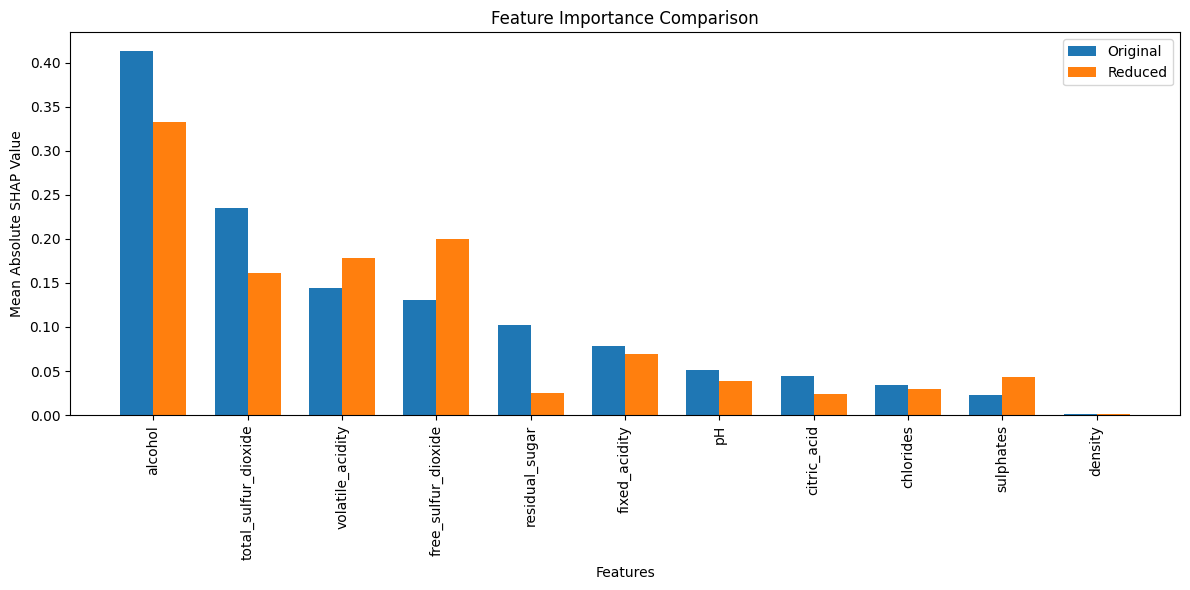

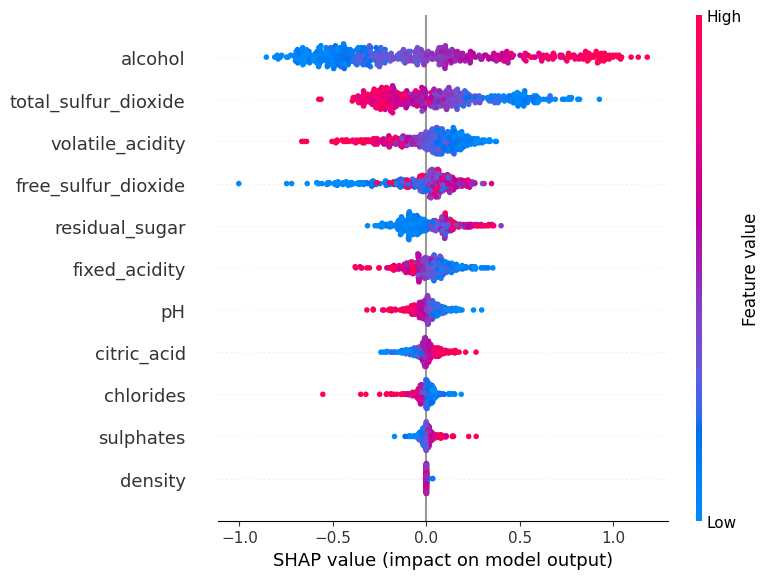

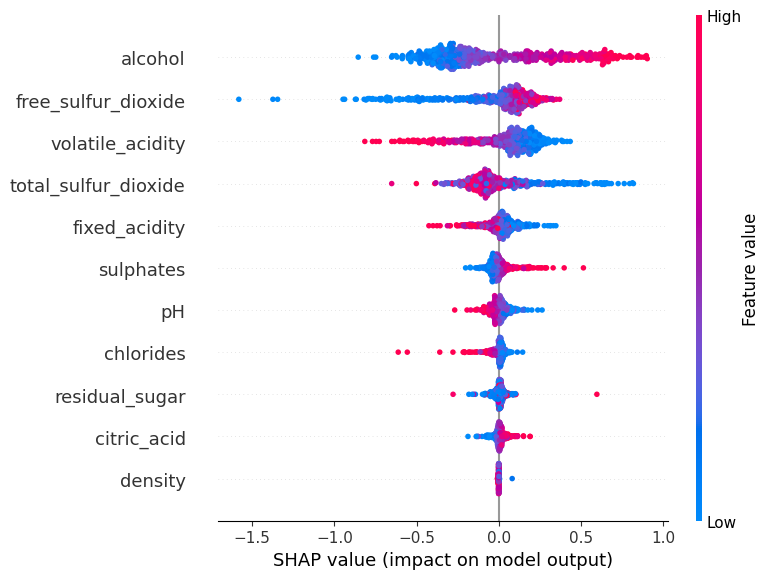

In [ ]:
# Original model feature importances
fi_original = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Original': mean_abs_shap_values_original
})

# Reduced model feature importances
fi_reduced = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Reduced': mean_abs_shap_values_reduced
})

fi_comparison = fi_original.merge(fi_reduced, on='Feature')

# Calculate the percentage change
fi_comparison['Percentage Change'] = (
    (fi_comparison['SHAP Importance Reduced'] - fi_comparison['SHAP Importance Original']) /
    fi_comparison['SHAP Importance Original']
) * 100

# Sort by original importance
fi_comparison_sorted = fi_comparison.sort_values('SHAP Importance Original', ascending=False)

# Plot
import matplotlib.pyplot as plt

x = np.arange(len(fi_comparison_sorted['Feature']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, fi_comparison_sorted['SHAP Importance Original'], width, label='Original')
plt.bar(x + width/2, fi_comparison_sorted['SHAP Importance Reduced'], width, label='Reduced')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.xticks(x, fi_comparison_sorted['Feature'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# For the original model
shap.summary_plot(shap_values_original.values, X_sample_original_df, feature_names=X_train.columns)

# For the reduced model
shap.summary_plot(shap_values_reduced.values, X_sample_reduced_df, feature_names=X_train.columns)


# shap.summary_plot(np.array(shap_values_original).mean(axis=0), X_sample_original, feature_names=X_train.columns)

# shap.summary_plot(np.array(shap_values_reduced).mean(axis=0), X_sample_reduced, feature_names=X_train.columns)

# Decision Trees -> Random Forest without reduction


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

num_epochs = 2 # epoch
n_samples = X_train.shape[0]

# Initialize the model
model_rf = RandomForestClassifier(n_estimators=20, random_state=42)
model_rf.fit(X_train, y_train)


y_test_pred = model_rf.predict(X_test)
print("\nCurrent Classification Report (pre-train model) on test data:")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))

y_val_pred = model_rf.predict(X_val)
print("\nCurrent Classification Report (pre-train model) on validate data:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))



Current Classification Report (pre-train model) on test data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.364     0.065     0.110        62
           5      0.574     0.604     0.588       457
           6      0.538     0.647     0.588       586
           7      0.429     0.340     0.380       197
           8      0.500     0.053     0.095        38

    accuracy                          0.537      1356
   macro avg      0.401     0.285     0.293      1356
weighted avg      0.519     0.537     0.515      1356


Current Classification Report (pre-train model) on validate data:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.250     0.032     0.057        31
           5      0.610     0.629     0.619       264
           6      0.526     0.653     0.583       337
           7      0.529     0.400     0.456       135
  

In [ ]:
from sklearn.utils import resample

train_predictions = model_rf.predict(X_train)
misclassified_indices = np.where(train_predictions != y_train)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Extract misclassified examples
X_minority = X_train.iloc[misclassified_indices]
y_minority = y_train.iloc[misclassified_indices]


X_upsampled, y_upsampled = resample(
    X_minority,
    y_minority,
    replace=True,
    n_samples=len(X_minority) * 10,  # Duplicate the misclassified examples
    random_state=42
)

# Combine original data with upsampled misclassified examples
X_combined = np.vstack((X_train, X_upsampled))
y_combined = np.hstack((y_train, y_upsampled))

models = []
num_epochs= 10
for epoch in range(num_epochs):
    # Bootstrap the data
    indices = np.random.choice(X_combined.shape[0], X_combined.shape[0], replace=True)
    X_bootstrap = X_combined[indices]
    y_bootstrap = y_combined[indices]
    X_bootstrap = pd.DataFrame(X_bootstrap, columns=X_train.columns)
    # Train a new smaller forest
    model_rf = RandomForestClassifier(n_estimators=150, random_state=epoch)
    model_rf.fit(X_bootstrap, y_bootstrap)
    models.append(model_rf)

# Final prediction using an ensemble of all forests
def ensemble_predict(models, X):
    preds = np.array([model.predict(X) for model in models])
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)

y_test_pred = ensemble_predict(models, X_test)
print("\nFinal Classification Report (Robustly Trained Model) on test dataset:")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))

# Evaluate on the validation set
y_val_pred = ensemble_predict(models,X_val)
print("\nFinal Classification Report (Robustly Trained Model) on validation dataset:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))

Number of misclassified examples: 9

Final Classification Report (Robustly Trained Model) on test dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.400     0.032     0.060        62
           5      0.616     0.641     0.628       457
           6      0.550     0.695     0.614       586
           7      0.417     0.279     0.334       197
           8      0.667     0.053     0.098        38

    accuracy                          0.560      1356
   macro avg      0.441     0.283     0.289      1356
weighted avg      0.543     0.560     0.531      1356


Final Classification Report (Robustly Trained Model) on validation dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.000     0.000     0.000        31
           5      0.659     0.674     0.667       264
           6      0.545     0.712     0.618       337
  

# Decision Trees -> Random Forest with reduction


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import defaultdict
import numpy as np

# Step 1: Training Random Forest and logging correctness
num_epochs = 2  # Number of epochs
n_samples = X_train.shape[0]
correctness_log = np.zeros((n_samples, num_epochs))

for epoch in range(num_epochs):
    # Train the Random Forest model
    model_rf2 = RandomForestClassifier(n_estimators=20, random_state=epoch)
    model_rf2.fit(X_train, y_train)

    # Predict on the training set
    train_predictions = model_rf2.predict(X_train)
    # Log correctness (1 if correct, 0 if incorrect)
    correctness_log[:, epoch] = (train_predictions == y_train).astype(int)

# Step 2: Evaluate the pre-trained model
y_test_pred = model_rf2.predict(X_test)
print("\nCurrent Classification Report (Pre-Train Model) on test dataset:")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))

y_val_pred = model_rf2.predict(X_val)
print("\nCurrent Classification Report (Pre-Train Model) on validation dataset:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))

# Step 3: Calculate forgettability scores
forgetting_events = np.sum((correctness_log[:, 1:] < correctness_log[:, :-1]), axis=1)

# Step 4: Identify indices to keep based on forgettability scores
class_indices = defaultdict(list)
for idx, label in enumerate(y_train):
    class_indices[label].append(idx)

# Calculate the number of examples to keep per class
reduction_factor = 0.7  # Keep 70% of data
num_examples_to_keep_per_class = {}
for label, indices in class_indices.items():
    num_examples = len(indices)
    num_to_keep = max(1, int(num_examples * reduction_factor))  # Ensure at least one example is kept
    num_examples_to_keep_per_class[label] = num_to_keep

# Select examples to keep per class
indices_to_keep = []
for label, indices in class_indices.items():
    # Get forgetting scores for the current class
    class_scores = forgetting_events[indices]
    # Rank indices within the class by their scores
    sorted_class_indices = [indices[i] for i in np.argsort(class_scores)]
    # Select top examples to keep
    indices_to_keep.extend(sorted_class_indices[-num_examples_to_keep_per_class[label]:])

# Step 5: Create the reduced dataset
X_train_reduced = X_train.reset_index().loc[indices_to_keep].drop(columns="index")
y_train_reduced = y_train.reset_index().loc[indices_to_keep].drop(columns="index")

print(f"Original training size: {X_train.shape}")
print(f"New training size after data drop: {X_train_reduced.shape}")



Current Classification Report (Pre-Train Model) on test dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.357     0.081     0.132        62
           5      0.585     0.611     0.597       457
           6      0.525     0.631     0.573       586
           7      0.429     0.335     0.376       197
           8      0.333     0.053     0.091        38

    accuracy                          0.532      1356
   macro avg      0.371     0.285     0.295      1356
weighted avg      0.512     0.532     0.512      1356


Current Classification Report (Pre-Train Model) on validation dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.500     0.032     0.061        31
           5      0.621     0.640     0.631       264
           6      0.532     0.671     0.593       337
           7      0.546     0.393     0.457     

In [ ]:
from sklearn.utils import resample

y_train_reduced = y_train_reduced.squeeze()
train_predictions = model_rf2.predict(X_train_reduced)
misclassified_indices = np.where(train_predictions != y_train_reduced)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Extract misclassified examples
X_minority = X_train_reduced.iloc[misclassified_indices]
y_minority = y_train_reduced.iloc[misclassified_indices]


X_upsampled, y_upsampled = resample(
    X_minority,
    y_minority,
    replace=True,
    n_samples=len(X_minority) * 10,  # Duplicate the misclassified examples
    random_state=42
)

# Combine original data with upsampled misclassified examples
X_combined = np.vstack((X_train_reduced, X_upsampled))
y_combined = np.hstack((y_train_reduced, y_upsampled))

models = []
num_epochs= 10
for epoch in range(num_epochs):
    # Bootstrap the data
    indices = np.random.choice(X_combined.shape[0], X_combined.shape[0], replace=True)
    X_bootstrap = X_combined[indices]
    y_bootstrap = y_combined[indices]
    X_bootstrap = pd.DataFrame(X_bootstrap, columns=X_train.columns)
    # Train a new smaller forest
    model_rf2 = RandomForestClassifier(n_estimators=100, random_state=epoch)
    model_rf2.fit(X_bootstrap, y_bootstrap)
    models.append(model_rf2)

# Final prediction using an ensemble of all forests
def ensemble_predict(models, X):
    preds = np.array([model.predict(X) for model in models])
    return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=preds)

y_test_pred = ensemble_predict(models, X_test)
print("\nFinal Classification Report (Robustly Trained Model) on test dataset:")
print(classification_report(y_test, y_test_pred, digits=3, zero_division=0))

# Evaluate on the validation set
y_val_pred = ensemble_predict(models,X_val)
print("\nFinal Classification Report (Robustly Trained Model) on validation dataset:")
print(classification_report(y_val, y_val_pred, digits=3, zero_division=0))

Number of misclassified examples: 393

Final Classification Report (Robustly Trained Model) on test dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000        16
           4      0.250     0.032     0.057        62
           5      0.556     0.639     0.595       457
           6      0.536     0.616     0.573       586
           7      0.479     0.350     0.405       197
           8      0.600     0.079     0.140        38

    accuracy                          0.536      1356
   macro avg      0.403     0.286     0.295      1356
weighted avg      0.517     0.536     0.513      1356


Final Classification Report (Robustly Trained Model) on validation dataset:
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         4
           4      0.000     0.000     0.000        31
           5      0.604     0.652     0.627       264
           6      0.527     0.656     0.585       337


In [ ]:
import shap
import torch
import shap
import pandas as pd
import numpy as np

# Convert training data to NumPy arrays for SHAP but maintain feature names for DataFrame compatibility
X_train_original_np = X_train.to_numpy()
X_train_reduced_np = X_train_reduced.to_numpy()

background_samples = 100  # Number of background samples for SHAP
X_background = X_train_original_np[np.random.choice(X_train_original_np.shape[0], background_samples, replace=False)]

# Ensure SHAP data has feature names by converting NumPy arrays back to DataFrames
X_background_df = pd.DataFrame(X_background, columns=X_train.columns)

# Initialize SHAP explainers using DataFrames
explainer_original = shap.Explainer(model_rf.predict, X_background_df)
explainer_reduced = shap.Explainer(model_rf2.predict, X_background_df)

# Choose a subset of data to explain
sample_indices = np.random.choice(X_train_reduced_np.shape[0], 500, replace=False)
X_sample_original = X_train_original_np[sample_indices]
X_sample_reduced = X_train_reduced_np[sample_indices]

# Convert the sample data back to DataFrames to match training input format
X_sample_original_df = pd.DataFrame(X_sample_original, columns=X_train.columns)
X_sample_reduced_df = pd.DataFrame(X_sample_reduced, columns=X_train.columns)

# Compute SHAP values
shap_values_original = explainer_original(X_sample_original_df)
shap_values_reduced = explainer_reduced(X_sample_reduced_df)

# Compute mean absolute SHAP values
mean_abs_shap_values_original = np.mean(np.abs(shap_values_original.values), axis=0)  # Average over samples
mean_abs_shap_values_reduced = np.mean(np.abs(shap_values_reduced.values), axis=0)    # Average over samples

print("Mean Absolute SHAP Values for Original Model:", mean_abs_shap_values_original)
print("Mean Absolute SHAP Values for Reduced Model:", mean_abs_shap_values_reduced)


PermutationExplainer explainer: 501it [08:58,  1.10s/it]
PermutationExplainer explainer: 501it [05:48,  1.40it/s]

Mean Absolute SHAP Values for Original Model: [0.03198619 0.10872143 0.04823143 0.04148    0.07943    0.05633619
 0.05121    0.06006476 0.05402095 0.06074095 0.24279238]
Mean Absolute SHAP Values for Reduced Model: [0.03793143 0.09735238 0.04893381 0.05496667 0.09579286 0.05903714
 0.0454419  0.07237667 0.05276667 0.0952919  0.25466762]


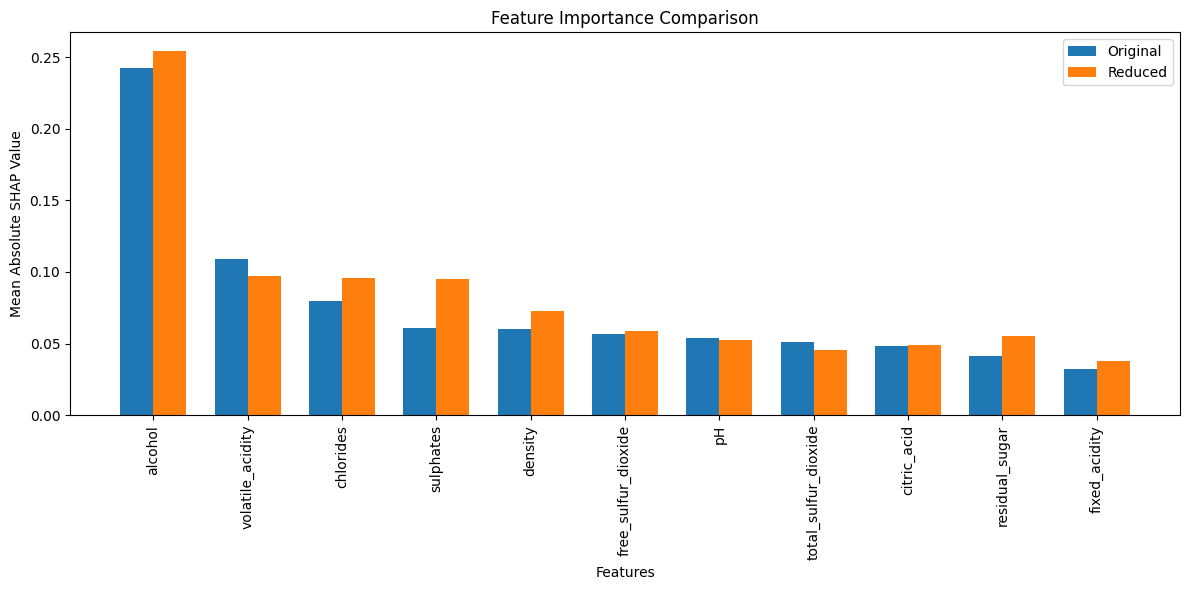

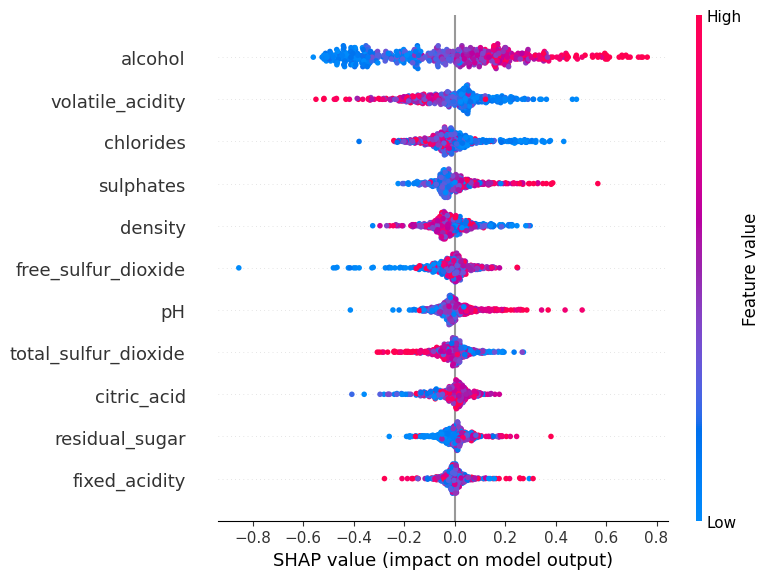

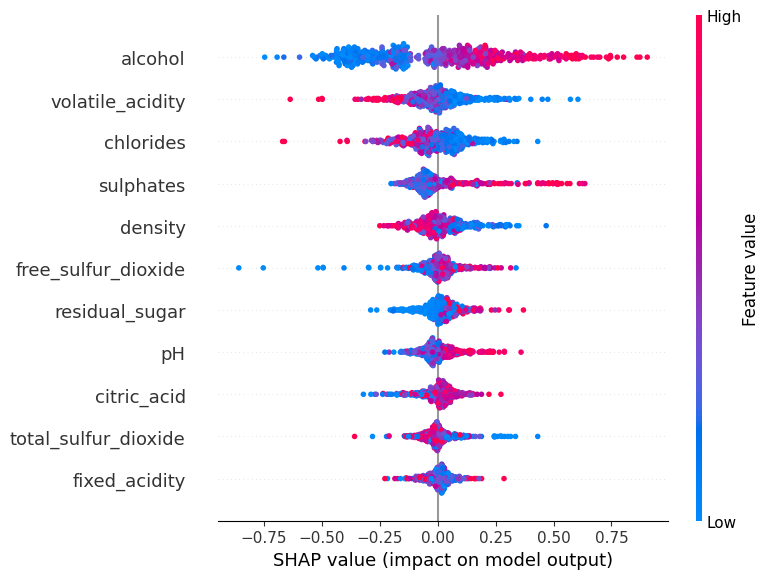

In [ ]:
# Original model feature importances
fi_original = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Original': mean_abs_shap_values_original
})

# Reduced model feature importances
fi_reduced = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP Importance Reduced': mean_abs_shap_values_reduced
})

fi_comparison = fi_original.merge(fi_reduced, on='Feature')

# Calculate the percentage change
fi_comparison['Percentage Change'] = (
    (fi_comparison['SHAP Importance Reduced'] - fi_comparison['SHAP Importance Original']) /
    fi_comparison['SHAP Importance Original']
) * 100

# Sort by original importance
fi_comparison_sorted = fi_comparison.sort_values('SHAP Importance Original', ascending=False)

# Plot
import matplotlib.pyplot as plt

x = np.arange(len(fi_comparison_sorted['Feature']))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, fi_comparison_sorted['SHAP Importance Original'], width, label='Original')
plt.bar(x + width/2, fi_comparison_sorted['SHAP Importance Reduced'], width, label='Reduced')
plt.title('Feature Importance Comparison')
plt.xlabel('Features')
plt.ylabel('Mean Absolute SHAP Value')
plt.xticks(x, fi_comparison_sorted['Feature'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# For the original model
shap.summary_plot(shap_values_original.values, X_sample_original_df, feature_names=X_train.columns)

# For the reduced model
shap.summary_plot(shap_values_reduced.values, X_sample_reduced_df, feature_names=X_train.columns)

